In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import wordcloud
import spacy
import matplotlib.pyplot as plt

# Data Loading

In [14]:
# # Loads data
articles_path = '../data/articles'

# Keeps titles and content
titles = []
contents = []

# Iterates over all news txt files in bbc dataset
for filename in glob.iglob(f'{articles_path}/**',recursive=True):
    # Exclude directories and README
    if (not ("README" in filename)) and '.txt' in filename :
        # Opens file 
        with open(filename,'r', encoding='utf8') as file_n:
            # Readlines from file
            file_text = file_n.readlines()
            # Distinguish title from content
            title = file_text[0].strip()
            content = ' '.join(file_text[1:]).strip()
            # Keep content and title
            titles.append(title)
            contents.append(content)

# Creates dataframe of titles and content
data = pd.DataFrame({'title':titles,'content':contents})

data.head(5)

,title,content
0,"﻿26-03-1996 I B112, D86, A1 1 I CALI / VALLE D...","“Les brindaremos nuevas oportunidades”, dijo l..."
1,﻿Pistoleros asesinaron a siete jóvenes en,Siete jóvenes menores de 20 años fueron asesin...
2,"﻿17-11-1997 IB118, D86I / I EL TIEMPO I 4A",Niños combatientes\n • i\n e deben estremecer ...
3,﻿Menores,• f\n no irán a combatir\n El presidente Ernes...
4,"﻿09-12-1995 I Bl I4,D86 I / I EL COLOMBIANO I 9C","María Victoria Fallón\n ""Objetivo de Colombia:..."


In [15]:
# Split train test
stop_ix = int(0.8*len(data.index))
data_train = data[:stop_ix]
data_test = data[stop_ix:]
len(data_train.index),len(data_test.index)

(160, 41)

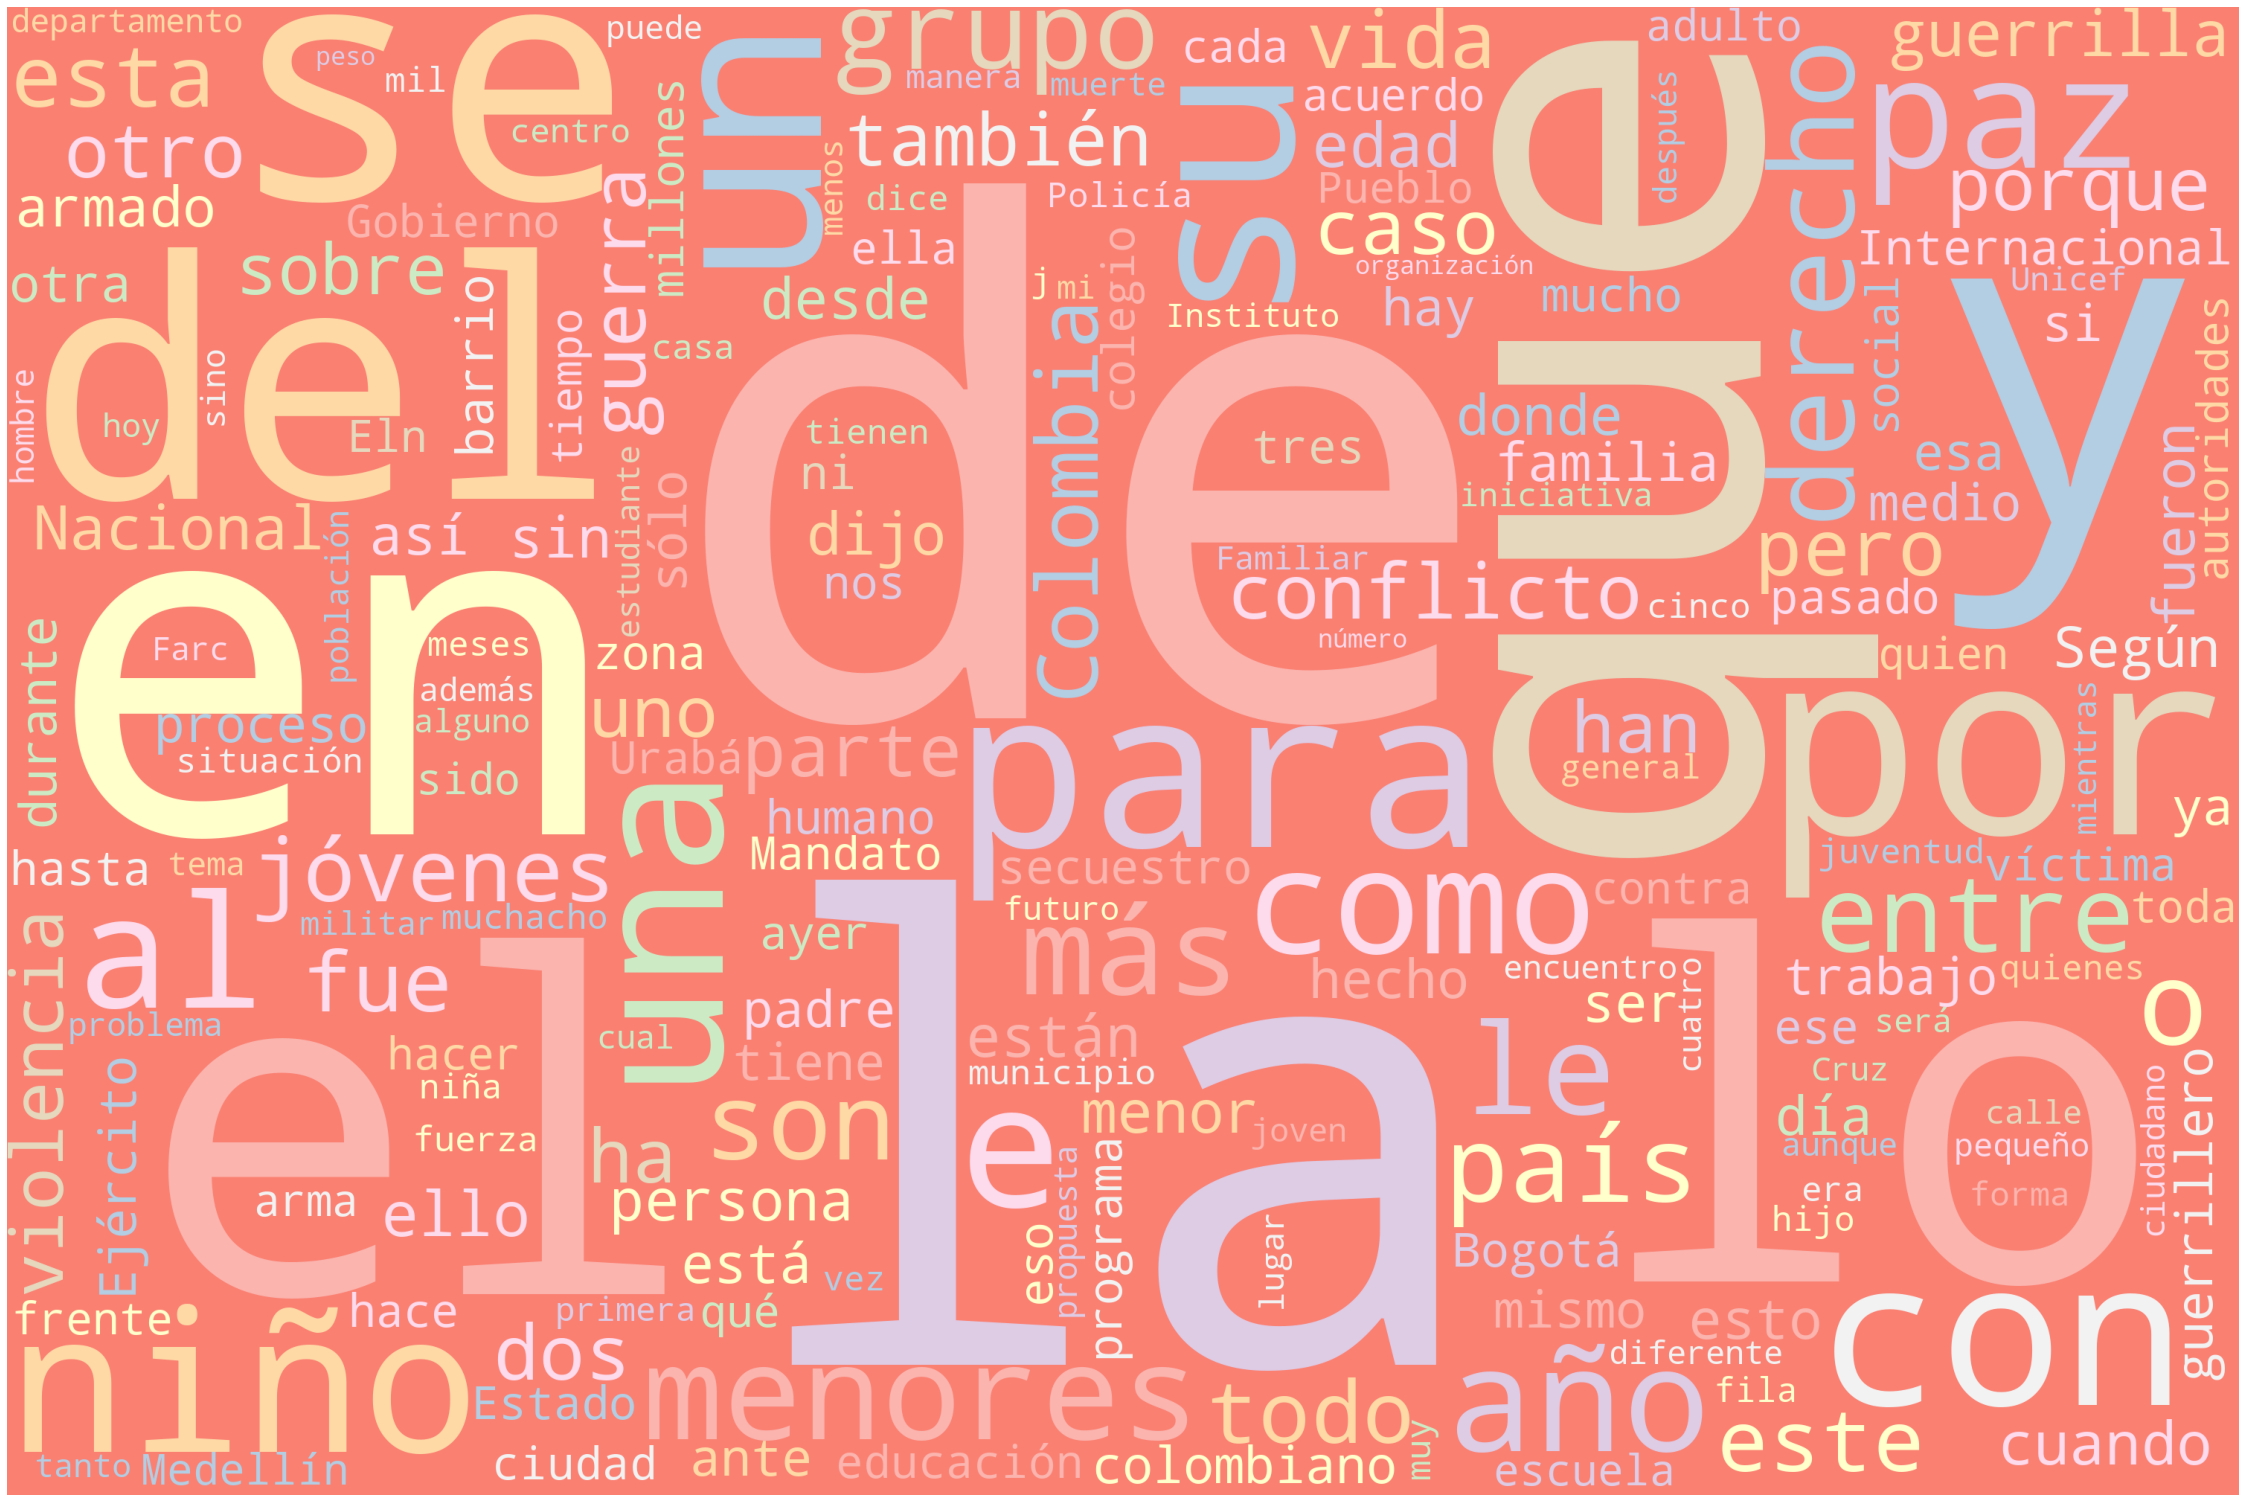

In [18]:
# Import package
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

# Text
overall_text = ' '.join(data['content'].array)

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000,
                      random_state=1, background_color='salmon', colormap='Pastel1',
                      collocations=False, stopwords = STOPWORDS).generate(overall_text)
# Plot
plot_cloud(wordcloud)

In [11]:
# Import spacy language nlp lib
from spacy.lang.en import English

# Define nlp class (includes tokenizer, lemmatization, POS tagging and NER)
nlp = spacy.load('es_core_news_sm')

# Preprocess all data
data_train['preprocessed'] = data_train['content'].apply(lambda x: nlp(x))

data_train

OSError: [E050] Can't find model 'es_core_news_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.